## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize
from tensorflow import expand_dims
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from PIL import Image
import requests
from io import BytesIO
import random

In [43]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## Data Loading

In [44]:
train_dir = 'dataset/fire_dataset/train/'
test_dir = 'dataset/fire_dataset/test/'

In [45]:
train_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=90, width_shift_range=0.4, height_shift_range=0.4, shear_range=0.4, zoom_range=0.4)
valid_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=23, class_mode='binary')
valid_data = valid_gen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=23, class_mode='binary')

Found 1169 images belonging to 2 classes.
Found 292 images belonging to 2 classes.


## Exploratory Data Analysis

In [50]:
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f'Found {len(dirnames)} folders with {len(filenames)} images in {dirpath}')

Found 2 folders with 0 images in dataset/fire_dataset/train/
Found 0 folders with 604 images in dataset/fire_dataset/train/fire
Found 0 folders with 565 images in dataset/fire_dataset/train/non_fire


In [51]:
for dirpath, dirnames, filenames in os.walk(test_dir):
  print(f'Found {len(dirnames)} folders with {len(filenames)} images in {dirpath}')

Found 2 folders with 0 images in dataset/fire_dataset/test/
Found 0 folders with 151 images in dataset/fire_dataset/test/fire
Found 0 folders with 141 images in dataset/fire_dataset/test/non_fire


### Fire Image Samples

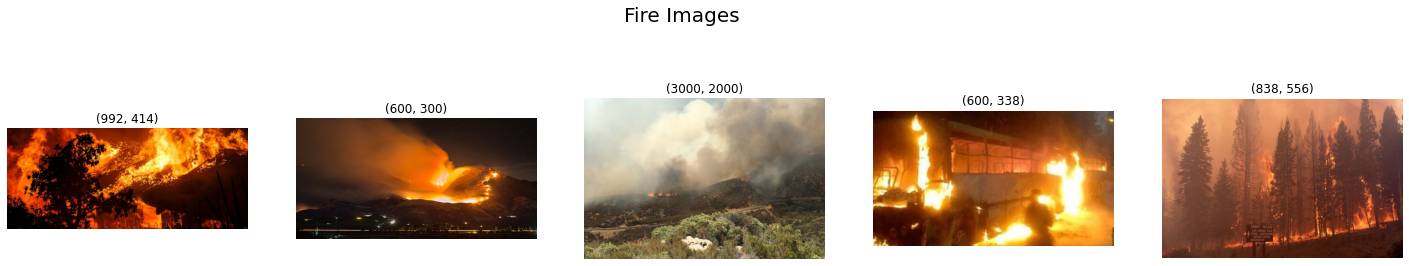

In [74]:
plt.figure(figsize=(25, 5))
plt.suptitle('Fire Images', fontsize=20)
for i in range(5):
    plt.subplot(1, 5, i+1)
    random_img = random.sample(os.listdir(train_dir + 'fire/'), 1)
    img = image.load_img(train_dir + 'fire/' + random_img[0])
    plt.imshow(img)
    plt.title(img.size)
    plt.axis('off')
plt.show()

### Non Fire Image Samples

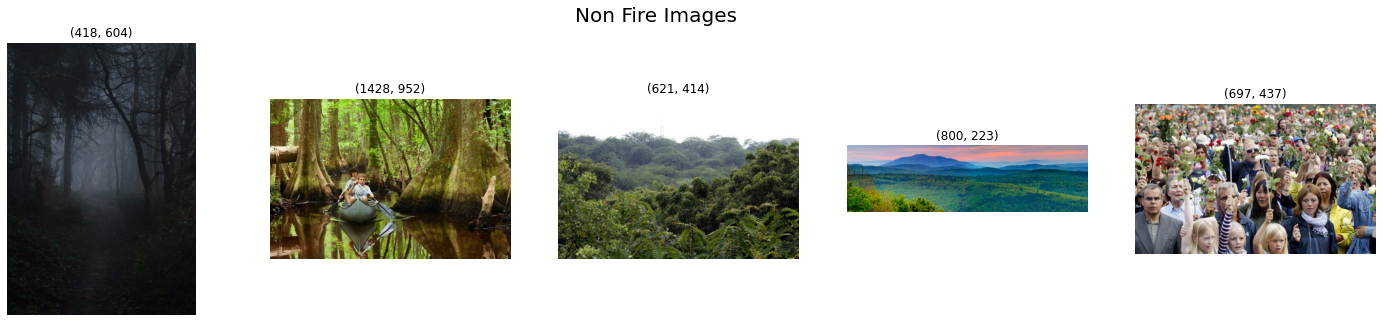

In [73]:
plt.figure(figsize=(25, 5))
plt.suptitle('Non Fire Images', fontsize=20)
for i in range(5):
    plt.subplot(1, 5, i+1)
    random_img = random.sample(os.listdir(train_dir + 'non_fire/'), 1)
    img = image.load_img(train_dir + 'non_fire/' + random_img[0])
    plt.imshow(img)
    plt.title(img.size)
    plt.axis('off')
plt.show()

## Data Preprocessing

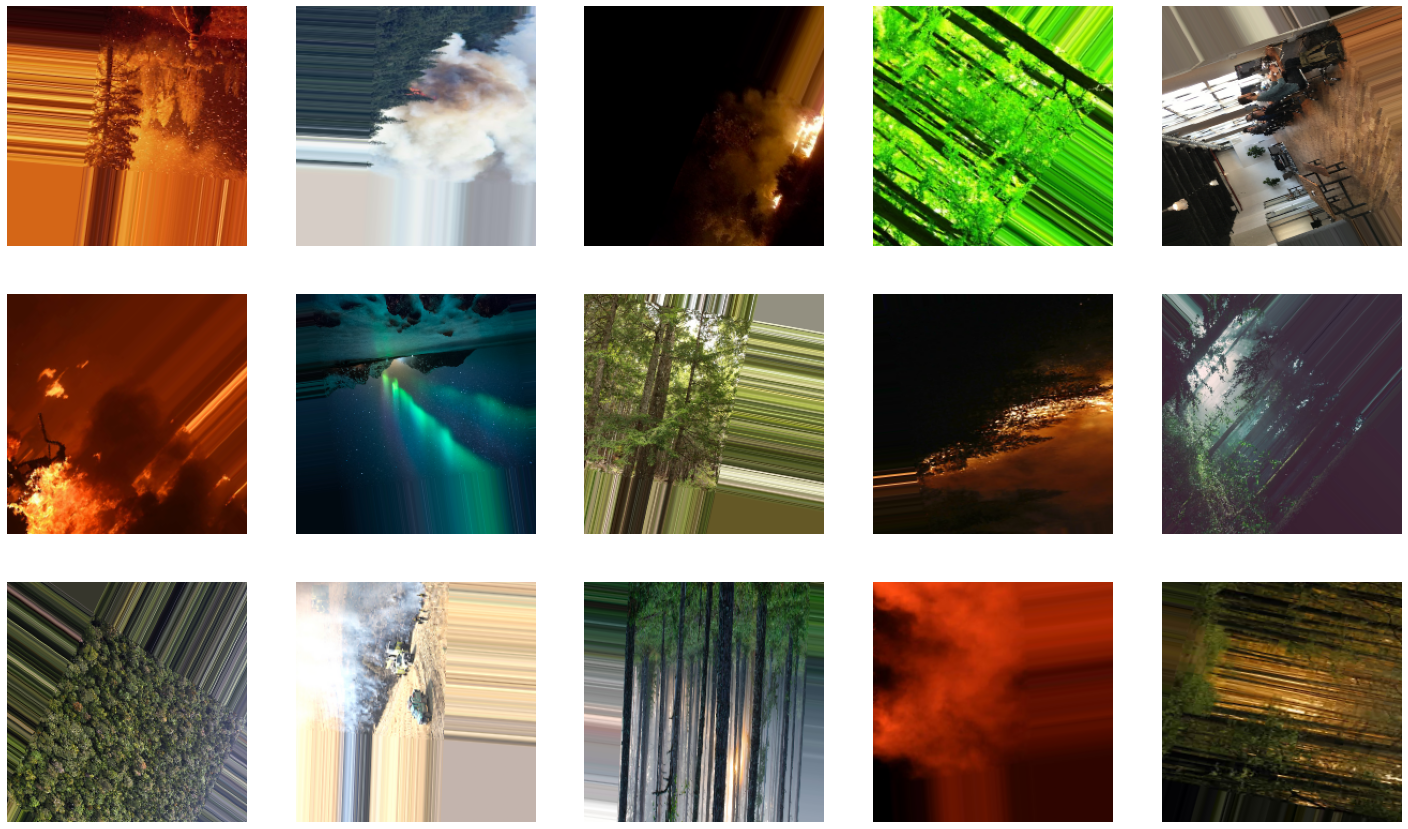

In [84]:
plt.figure(figsize=(25, 15))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(train_data[i][0][0])
    plt.axis('off')
plt.show()

## Model Definition

In [85]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0         
                                                                 
 dense_14 (Dense)            (None, 16)               

## Model Training

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=25, validation_data=valid_data)

## Model Evaluation

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.tail()

### Loss and Accuracy Curves

### Confusion Matrix

### Model Analysis

## Model Improvement

### Loss and Accuracy Curves

### Confusion Matrix

### Model Analysis

## Model Saving

## Model Testing

## Conclusion